In [76]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


data_train=pd.read_csv('train.csv')
target_data=data_train['SalePrice']
data_train=data_train.drop('SalePrice', axis = 1)


data_test=pd.read_csv('test.csv')
combine=[data_train,data_test]
train = pd.concat(combine)

In [77]:
# Drop Id column
train.drop("Id", axis = 1, inplace = True)

In [78]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

In [79]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [80]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [81]:
# Create new features
# 1* Simplifications of existing features
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

Find most important features relative to target


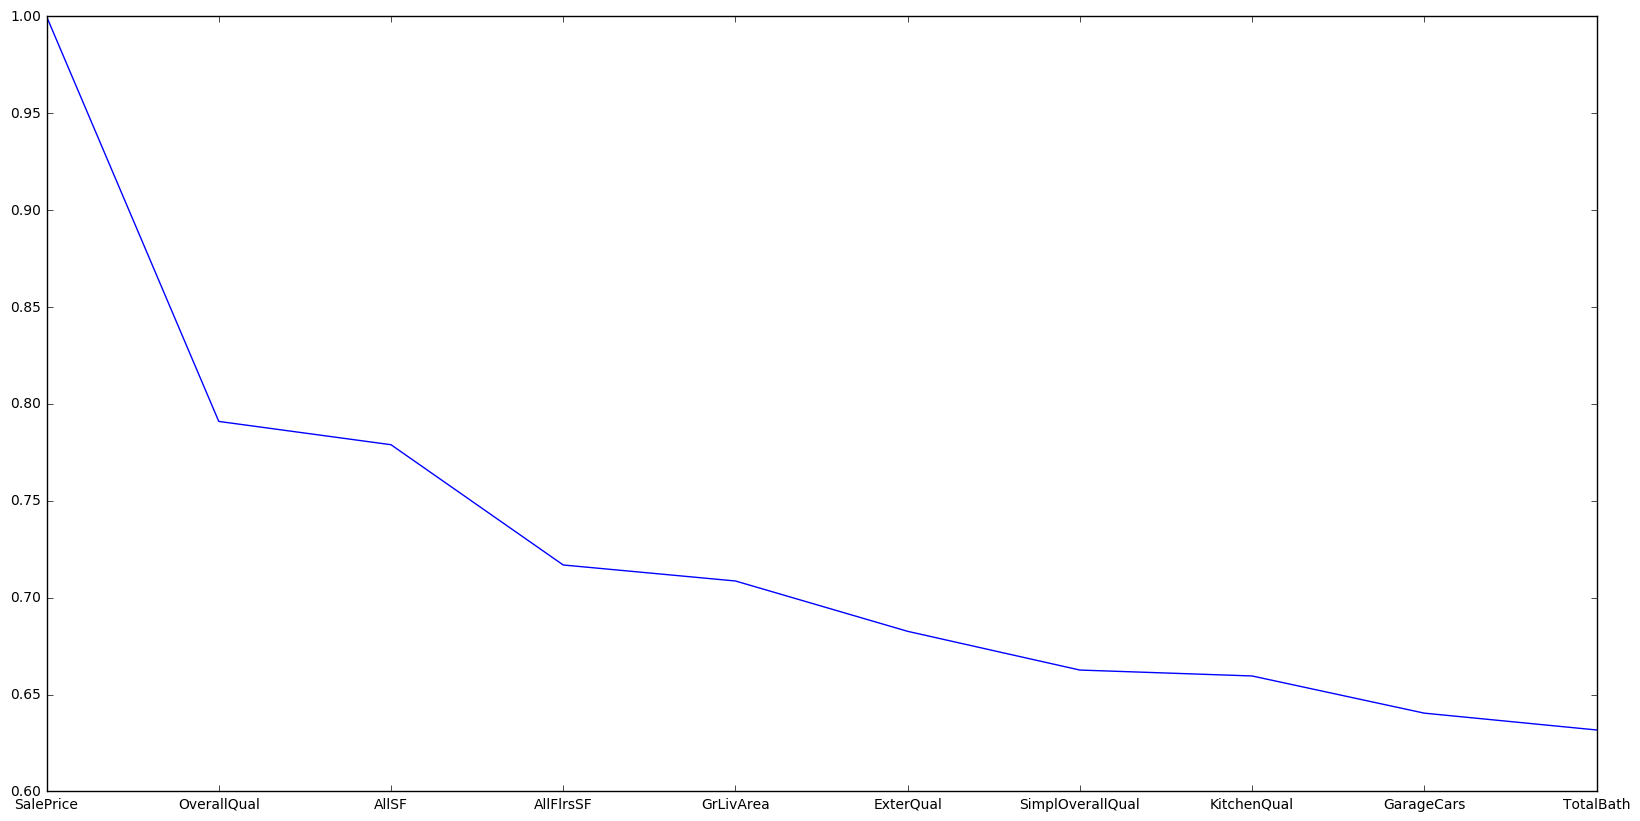

In [82]:
# Find most important features relative to target
train_cor=train[:1460]
train_cor_new = pd.concat([train_cor, target_data], axis=1, join_axes=[train_cor.index])
print("Find most important features relative to target")
corr = train_cor_new.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
#print(corr.SalePrice)
fig, ax = plt.subplots(figsize=(20, 10))
corr.SalePrice[:10].plot()
plt.show()

In [83]:
# Create new features
# 3* Polynomials on the top 10 existing features
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [84]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 117
Categorical features : 26


In [85]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 166
Remaining NAs for numerical features in train : 0


In [86]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

87 skewed numerical features to log transform


In [87]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 8
Remaining NAs for categorical features in train : 0


In [88]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 321


In [89]:
from sklearn.cross_validation import train_test_split
feature_train_all=train[:1460]
feature_test=train[1460:]
target_data=np.log(target_data)
X_train, X_test, y_train, y_test = train_test_split(feature_train_all,target_data, test_size = 0.2, random_state = 0)


# Lasso

In [19]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(feature_train_all, np.log(target_data))
alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(feature_train_all, target_data)
alpha = lasso.alpha_
##print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
#print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
Ypred = np.exp(lasso.predict(feature_test))

#Your submission scored 0.12597, which is an improvement ofyour previous score of 0.12805. Great job!

In [20]:
submission = pd.DataFrame({
        "Id": data_test["Id"],
        "SalePrice": Ypred
    })
submission.to_csv('submission.csv', index=False)

# scored 0.12967

# RandomForest

In [23]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=180)
model.fit(X_train,y_train)
model.predict(X_test)
print(r2_score(y_test,predictions))


0.831863825002


In [45]:
model =  RandomForestRegressor(n_estimators=180)
model.fit(feature_train_all, target_data)
Y_pred=model.predict(feature_test)

submission = pd.DataFrame({
        "Id": data_test["Id"],
        "SalePrice": np.exp(Y_pred)
    })
submission.to_csv('submission.csv', index=False)
# Scored 0.13977

# Neural Nets

Trial_1

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(50, init='normal', activation='relu'))
    model.add(Dense(50, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="normal", input_dim=321, activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


0.743249625235


Trial_2

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(100, init='normal', activation='relu'))
    model.add(Dense(100, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=321, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


0.79714307064


In [ ]:
Trial_3

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(100, init='normal', activation='relu'))
    model.add(Dense(100, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(feature_train_all.values, target_data) 
Y_pred=kr.model.predict(feature_test.values)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="normal", input_dim=321, activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


In [43]:
test_ids = data_test["Id"].values
 
to_save = np.concatenate((np.reshape(test_ids,(len(test_ids),1)), np.exp(Y_pred)),axis=1)
np.savetxt("predictions.csv",to_save,header="Id,SalePrice",delimiter=',',comments="",fmt=["%8i", "%8.6f"],)
# Scored 0.13410

In [ ]:
Trial_4

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

layers=105
# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu", input_dim=321)`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


0.829621521267


In [29]:
kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(feature_train_all.values, target_data) 
Y_pred=kr.model.predict(feature_test.values)

test_ids = data_test["Id"].values
 
to_save = np.concatenate((np.reshape(test_ids,(len(test_ids),1)), np.exp(Y_pred)),axis=1)
np.savetxt("predictions.csv",to_save,header="Id,SalePrice",delimiter=',',comments="",fmt=["%8i", "%8.6f"],)

# scored 0.13482

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu", input_dim=321)`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_initializer="normal", activation="relu")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


Trial_5:try applying drop out

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.constraints import maxnorm

layers=105
dropout=0.2
# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train.shape[1], init='normal', activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(layers, init='normal', activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(layers, init='normal', activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=200, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", input_dim=321, kernel_constraint=<keras.con..., kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_constraint=<keras.con..., activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, kernel_constraint=<keras.con..., activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


-0.0325236458977


In [ ]:
Trial_6

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.constraints import maxnorm

layers=105
dropout=0.2
# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

# evaluate model with standardized dataset
#kr = KerasRegressor(build_fn=model, nb_epoch=500, batch_size=1, verbose=0)

#scores = cross_val_score(kr, X, y, cv=4)
#print("msle = %4.2f std = %4.2f" % (scores.mean(),scores.std()))

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, input_dim=321, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


-0.12914855902


Trial_7

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

layers=105
# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, input_dim=321, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


0.831605186099


In [ ]:
Trial_8

In [92]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

layers=110
# define base mode
def model():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train.shape[1], init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(layers, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='msle', optimizer='adam')
    return model

kr = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)
kr = kr.fit(X_train.values,y_train) 

predictions = kr.model.predict(X_test.values)
print(r2_score(y_test,predictions))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(110, input_dim=321, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(110, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(110, activation="relu", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`


0.728083717127
